### Association Rule Mining

Association rule analysis is a technique used in data mining to discover relationships or associations between variables in large datasets. It's most commonly applied in the context of market basket analysis to find out which products tend to be bought together.
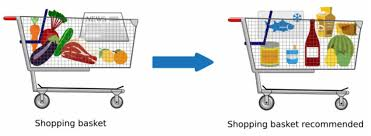

**Market Basket Analysis** - Is a technique used by large retailers to uncover associations between items. It works by looking for combinations of items that occur together frequently in transactions, providing information to understand the purchase behavior. The outcome of this type of technique is, in simple terms, a set of rules that can be understood as “if this, then that”.


**Support:** Support is an indication of how frequently the itemset appears in the dataset.
Support is a so-called frequency constraint. Its main feature is that it possesses the property of down-ward closure which means that all sub sets of a frequent set (support > min. support threshold) are also frequent. This property (actually, the fact that no super set of a infrequent set can be frequent) is used to prune the search space (usually a tree of item sets with increasing size) in level-wise algorithms (e.g., the APRIORI algorithm). The disadvantage of support is the rare item problem. Items that occur very infrequently in the data set are pruned although they would still produce interesting and potentially valuable rules.

**Confidence:** Confidence is an indication of how often the rule has been found to be true.
Confidence is not down-ward closed and was developed together with support (the so-called support-confidence framework). While support is used to prune the search space and only leave potentially interesting rules, confidence is used in a second step to filter rules that exceed a min. confidence threshold. A problem with confidence is that it is sensitive to the frequency of the consequent (Y) in the data set. Caused by the way confidence is calculated, Ys with higher support will automatically produce higher confidence values even if they exists no association between the items.

**Lift:** The ratio of the observed support to that expected if X and Y were independent.
Leverage measures the difference of X and Y appearing together in the data set and what would be expected if X and Y where statistically dependent. The rational in a sales setting is to find out how many more units (items X and Y together) are sold than expected from the independent sells. Using min. leverage thresholds at the same time incorporates an implicit frequency constraint. E.g., for setting a min. leverage thresholds to 0.01% (corresponds to 10 occurrence in a data set with 100,000 transactions) one first can use an algorithm to find all itemsets with min. support of 0.01% and then filter the found item sets using the leverage constraint. Because of this property leverage also can suffer from the rare item problem.

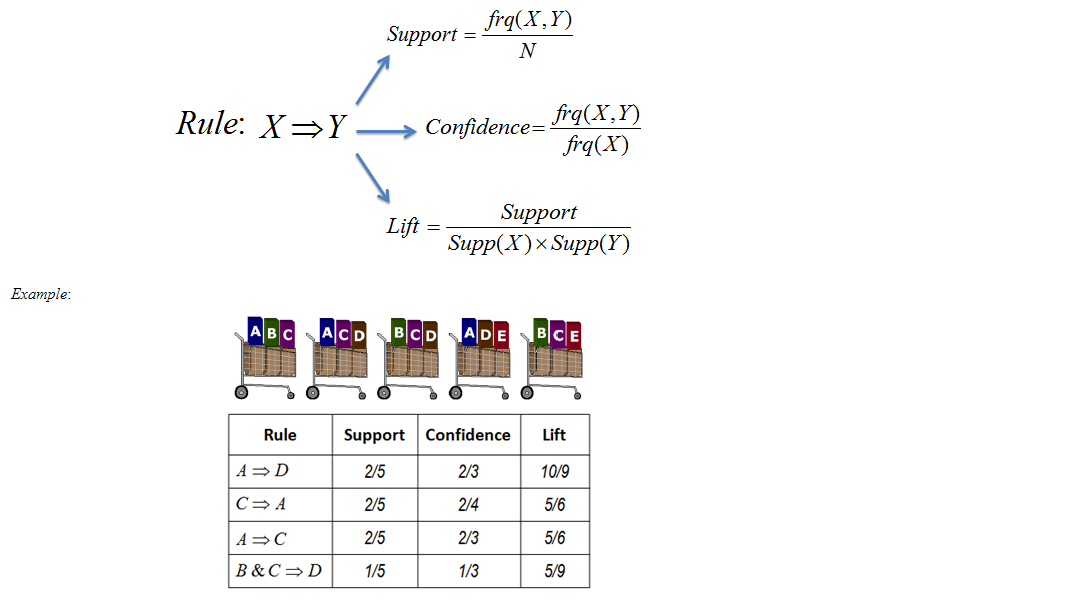

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\dell\Downloads\GroceryStoreDataSet (1).csv",header=None,names=['product'])
df

,product
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"
5,"BREAD,TEA,BOURNVITA"
6,"MAGGI,TEA,CORNFLAKES"
7,"MAGGI,BREAD,TEA,BISCUIT"
8,"JAM,MAGGI,BREAD,TEA"
9,"BREAD,MILK"


In [3]:
df.shape

(20, 1)

In [4]:
df.values

array([['MILK,BREAD,BISCUIT'],
       ['BREAD,MILK,BISCUIT,CORNFLAKES'],
       ['BREAD,TEA,BOURNVITA'],
       ['JAM,MAGGI,BREAD,MILK'],
       ['MAGGI,TEA,BISCUIT'],
       ['BREAD,TEA,BOURNVITA'],
       ['MAGGI,TEA,CORNFLAKES'],
       ['MAGGI,BREAD,TEA,BISCUIT'],
       ['JAM,MAGGI,BREAD,TEA'],
       ['BREAD,MILK'],
       ['COFFEE,COKE,BISCUIT,CORNFLAKES'],
       ['COFFEE,COKE,BISCUIT,CORNFLAKES'],
       ['COFFEE,SUGER,BOURNVITA'],
       ['BREAD,COFFEE,COKE'],
       ['BREAD,SUGER,BISCUIT'],
       ['COFFEE,SUGER,CORNFLAKES'],
       ['BREAD,SUGER,BOURNVITA'],
       ['BREAD,COFFEE,SUGER'],
       ['BREAD,COFFEE,SUGER'],
       ['TEA,MILK,COFFEE,CORNFLAKES']], dtype=object)

In [5]:
data = list(df["product"].apply(lambda x:x.split(',')))
data 

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COKE', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COKE', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COKE'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [6]:
!pip install mlxtend

In [7]:
from mlxtend.preprocessing import TransactionEncoder

In [8]:
te = TransactionEncoder()
te_data = te.fit(data).transform(data)
df = pd.DataFrame(te_data,columns=te.columns_)
df

,BISCUIT,BOURNVITA,BREAD,COFFEE,COKE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True
5,False,True,True,False,False,False,False,False,False,False,True
6,False,False,False,False,False,True,False,True,False,False,True
7,True,False,True,False,False,False,False,True,False,False,True
8,False,False,True,False,False,False,True,True,False,False,True
9,False,False,True,False,False,False,False,False,True,False,False


In [9]:
df.sum()

BISCUIT        7
BOURNVITA      4
BREAD         13
COFFEE         8
COKE           3
CORNFLAKES     6
JAM            2
MAGGI          5
MILK           5
SUGER          6
TEA            7
dtype: int64

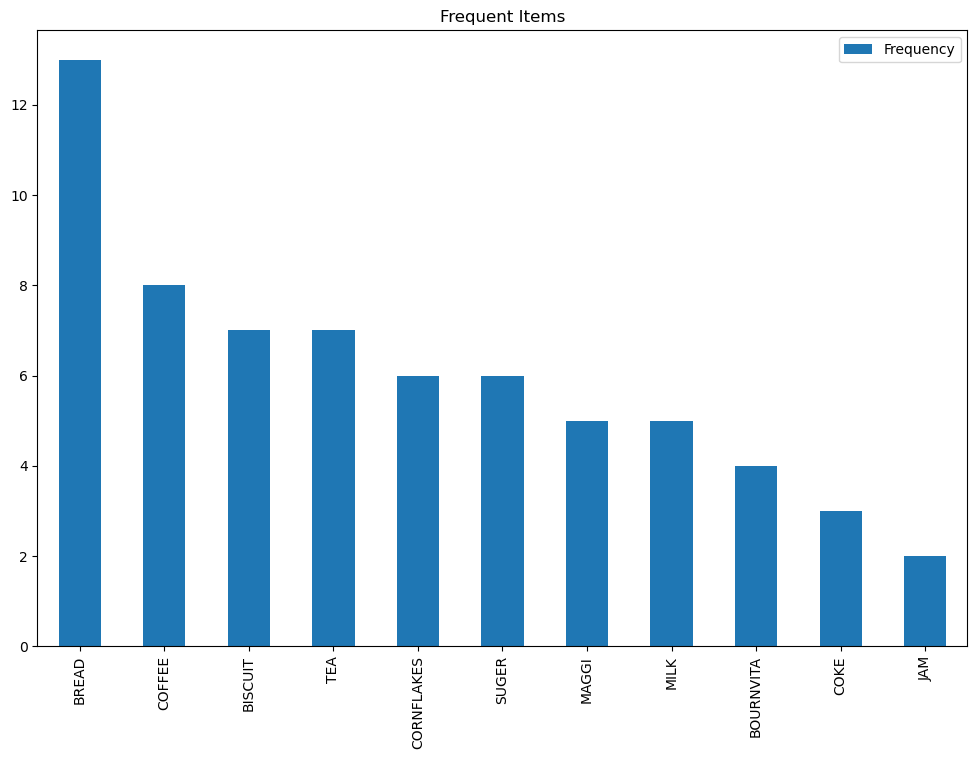

In [10]:
import matplotlib.pyplot as plt 

df.sum().to_frame('Frequency').sort_values('Frequency',ascending=False).plot(kind='bar',
                                                                                  figsize=(12,8),
                                                                                  title="Frequent Items")
plt.show()

In [11]:
df.shape[0]

20

In [12]:
# Product Frequency / Total Sales
first = pd.DataFrame(df.sum() / df.shape[0],columns = ["Support"]).sort_values("Support", ascending = False)
first

,Support
BREAD,0.65
COFFEE,0.40
BISCUIT,0.35
TEA,0.35
CORNFLAKES,0.30
SUGER,0.30
MAGGI,0.25
MILK,0.25
BOURNVITA,0.20
COKE,0.15


In [13]:
# Elimination by Support Value
first[first.Support < 0.20]

,Support
COKE,0.15
JAM,0.10


In [14]:
import itertools

In [15]:
second = list(itertools.combinations(first.index, 2))
second = [list(i) for i in second]
# Sample of combinations
second

[['BREAD', 'COFFEE'],
 ['BREAD', 'BISCUIT'],
 ['BREAD', 'TEA'],
 ['BREAD', 'CORNFLAKES'],
 ['BREAD', 'SUGER'],
 ['BREAD', 'MAGGI'],
 ['BREAD', 'MILK'],
 ['BREAD', 'BOURNVITA'],
 ['BREAD', 'COKE'],
 ['BREAD', 'JAM'],
 ['COFFEE', 'BISCUIT'],
 ['COFFEE', 'TEA'],
 ['COFFEE', 'CORNFLAKES'],
 ['COFFEE', 'SUGER'],
 ['COFFEE', 'MAGGI'],
 ['COFFEE', 'MILK'],
 ['COFFEE', 'BOURNVITA'],
 ['COFFEE', 'COKE'],
 ['COFFEE', 'JAM'],
 ['BISCUIT', 'TEA'],
 ['BISCUIT', 'CORNFLAKES'],
 ['BISCUIT', 'SUGER'],
 ['BISCUIT', 'MAGGI'],
 ['BISCUIT', 'MILK'],
 ['BISCUIT', 'BOURNVITA'],
 ['BISCUIT', 'COKE'],
 ['BISCUIT', 'JAM'],
 ['TEA', 'CORNFLAKES'],
 ['TEA', 'SUGER'],
 ['TEA', 'MAGGI'],
 ['TEA', 'MILK'],
 ['TEA', 'BOURNVITA'],
 ['TEA', 'COKE'],
 ['TEA', 'JAM'],
 ['CORNFLAKES', 'SUGER'],
 ['CORNFLAKES', 'MAGGI'],
 ['CORNFLAKES', 'MILK'],
 ['CORNFLAKES', 'BOURNVITA'],
 ['CORNFLAKES', 'COKE'],
 ['CORNFLAKES', 'JAM'],
 ['SUGER', 'MAGGI'],
 ['SUGER', 'MILK'],
 ['SUGER', 'BOURNVITA'],
 ['SUGER', 'COKE'],
 ['SUGER', 'JA

In [16]:
from mlxtend.frequent_patterns import apriori

In [17]:
#pd.set_option("display.max_rows",None)

In [18]:
df1 = apriori(df,min_support=0.001,use_colnames=True)
df1

,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.40,(COFFEE)
4,0.15,(COKE)
...,...,...
78,0.05,"(BISCUIT, MAGGI, TEA, BREAD)"
79,0.10,"(BISCUIT, COFFEE, CORNFLAKES, COKE)"
80,0.05,"(JAM, MAGGI, MILK, BREAD)"
81,0.05,"(JAM, MAGGI, TEA, BREAD)"


In [19]:
df1.sort_values(by="support",ascending=False)

,support,itemsets
2,0.65,(BREAD)
3,0.40,(COFFEE)
0,0.35,(BISCUIT)
10,0.35,(TEA)
5,0.30,(CORNFLAKES)
...,...,...
55,0.05,"(BISCUIT, CORNFLAKES, MILK)"
57,0.05,"(SUGER, BOURNVITA, BREAD)"
17,0.05,"(BISCUIT, SUGER)"
59,0.05,"(COFFEE, SUGER, BOURNVITA)"


In [20]:
df1['length'] = df1['itemsets'].apply(lambda x:len(x))
df1

,support,itemsets,length
0,0.35,(BISCUIT),1
1,0.20,(BOURNVITA),1
2,0.65,(BREAD),1
3,0.40,(COFFEE),1
4,0.15,(COKE),1
...,...,...,...
78,0.05,"(BISCUIT, MAGGI, TEA, BREAD)",4
79,0.10,"(BISCUIT, COFFEE, CORNFLAKES, COKE)",4
80,0.05,"(JAM, MAGGI, MILK, BREAD)",4
81,0.05,"(JAM, MAGGI, TEA, BREAD)",4


In [21]:
df1[(df1['length']==4) & (df1['support']<0.15)]

,support,itemsets,length
77,0.05,"(BISCUIT, CORNFLAKES, MILK, BREAD)",4
78,0.05,"(BISCUIT, MAGGI, TEA, BREAD)",4
79,0.10,"(BISCUIT, COFFEE, CORNFLAKES, COKE)",4
80,0.05,"(JAM, MAGGI, MILK, BREAD)",4
81,0.05,"(JAM, MAGGI, TEA, BREAD)",4
82,0.05,"(TEA, COFFEE, CORNFLAKES, MILK)",4


In [22]:
from mlxtend.frequent_patterns import association_rules

In [23]:
# Association Rules & Info
df_ar = association_rules(df1, metric = "confidence", min_threshold = 0.8)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(JAM),(BREAD),0.10,0.65,0.10,1.0,1.538462,0.0350,inf,0.388889
1,(MILK),(BREAD),0.25,0.65,0.20,0.8,1.230769,0.0375,1.75,0.250000
2,(COKE),(COFFEE),0.15,0.40,0.15,1.0,2.500000,0.0900,inf,0.705882
3,(JAM),(MAGGI),0.10,0.25,0.10,1.0,4.000000,0.0750,inf,0.833333
4,(MAGGI),(TEA),0.25,0.35,0.20,0.8,2.285714,0.1125,3.25,0.750000
...,...,...,...,...,...,...,...,...,...,...
60,"(CORNFLAKES, MILK, TEA)",(COFFEE),0.05,0.40,0.05,1.0,2.500000,0.0300,inf,0.631579
61,"(CORNFLAKES, COFFEE, MILK)",(TEA),0.05,0.35,0.05,1.0,2.857143,0.0325,inf,0.684211
62,"(COFFEE, TEA)","(CORNFLAKES, MILK)",0.05,0.10,0.05,1.0,10.000000,0.0450,inf,0.947368
63,"(MILK, TEA)","(CORNFLAKES, COFFEE)",0.05,0.20,0.05,1.0,5.000000,0.0400,inf,0.842105


* Antecedent support variable tells us probability of antecedent products alone
* Consequents support variable tells us probability of consequents products alone
* The support value is the value of the two products (Antecedents and Consequents)
* Confidence is an indication of how often the rule has been found to be true.
* The ratio of the observed support to that expected if X and Y were independent.

**Lift indicates:**

1. Whether if two type of products can be sold together - lift value higher than 1
2. Whether 1 product be substitute of other - lift value lower than 1
3. Whether if there is no relation between the type or products - lift value equals to 1

In [24]:
df_ar[(df_ar.support > 0.15) & (df_ar.confidence > 0.70)].sort_values("confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(MILK),(BREAD),0.25,0.65,0.2,0.8,1.230769,0.0375,1.75,0.25
4,(MAGGI),(TEA),0.25,0.35,0.2,0.8,2.285714,0.1125,3.25,0.75


**For MILK-BREAD pair:** antecedent support=0.25: Milk is observed in 25% of all the purchases. consequent support=0.65: Bread is observed 65% of all the purchases. support=0.20 : Milk and Bread are observed together in 20% of all purchases. confidence=0.8: If Milk is bought, Bread is 80% likely to be bought as well. Lift=1.23: That means Milk and Bread affects each other's sales positively. Sales of Bread increase by 1.23 times in transactions which contains Milk or visa versa.

**For MAGGI-TEA pair:** antecedent support=0.25: Maggi is observed in 25% of all the purchases. consequent support=0.35: Tea is observed 35% of all the purchases. support=0.20 : Maggi and Tea are observed together in 20% of all purchases. confidence=0.8: If Maggi is bought, Tea is 80% likely to be bought as well. Lift=2.286: That means Maggi and Tea affects each other's sales positively. Sales of Maggi increase by 2.286 times in transactions which contains Tea or visa versa.

In [25]:
df_lift = association_rules(df1, metric = 'lift', min_threshold = 1) 
# displaying results with lift >= 1
df_lift.sort_values(by = 'lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
215,"(CORNFLAKES, COKE)","(BISCUIT, COFFEE)",0.10,0.10,0.10,1.00,10.0,0.090,inf,1.000000
230,(JAM),"(MAGGI, MILK, BREAD)",0.10,0.05,0.05,0.50,10.0,0.045,1.9,1.000000
223,"(MAGGI, MILK, BREAD)",(JAM),0.05,0.10,0.05,1.00,10.0,0.045,inf,0.947368
210,"(BISCUIT, COFFEE)","(CORNFLAKES, COKE)",0.10,0.10,0.10,1.00,10.0,0.090,inf,1.000000
185,"(BISCUIT, MILK)","(CORNFLAKES, BREAD)",0.10,0.05,0.05,0.50,10.0,0.045,1.9,1.000000
...,...,...,...,...,...,...,...,...,...,...
41,(MAGGI),"(BISCUIT, BREAD)",0.25,0.20,0.05,0.20,1.0,0.000,1.0,0.000000
140,"(CORNFLAKES, COFFEE)",(MILK),0.20,0.25,0.05,0.25,1.0,0.000,1.0,0.000000
127,(MAGGI),"(MILK, BREAD)",0.25,0.20,0.05,0.20,1.0,0.000,1.0,0.000000
126,"(MILK, BREAD)",(MAGGI),0.20,0.25,0.05,0.25,1.0,0.000,1.0,0.000000


In [26]:
df_lift = association_rules(df1, metric = 'lift', min_threshold = 0) # displaying results with lift >= 0
df_lift[df_lift['lift'] == 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
79,"(BISCUIT, BREAD)",(MAGGI),0.20,0.25,0.05,0.25,1.0,0.0,1.0,0.0
82,(MAGGI),"(BISCUIT, BREAD)",0.25,0.20,0.05,0.20,1.0,0.0,1.0,0.0
188,"(MILK, BREAD)",(MAGGI),0.20,0.25,0.05,0.25,1.0,0.0,1.0,0.0
189,(MAGGI),"(MILK, BREAD)",0.25,0.20,0.05,0.20,1.0,0.0,1.0,0.0
204,"(CORNFLAKES, COFFEE)",(MILK),0.20,0.25,0.05,0.25,1.0,0.0,1.0,0.0
209,(MILK),"(CORNFLAKES, COFFEE)",0.25,0.20,0.05,0.20,1.0,0.0,1.0,0.0
